In [1]:
import json
import sys
sys.path.append('/home/nbuser/library/')

import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
def getC18_CURPOP(df):
    url = 'https://koordinates.com/services/query/v1/vector.json'

    params = {
        'key' : '6ff1aad9ba4d405b86f1964819c4d580',
        'layer' : '104612',
        'x' : df.Longitude,
        'y' : df.Latitude
    }

    response = requests.get(url, params = params)

    if response.status_code != 200:
        return response.status_code
    
    c18_curpop = response.json()["vectorQuery"]['layers']['104612']['features'][0]['properties']['C18_CURPop']
    return pd.Series({'C18_CURPOP' : c18_curpop})

In [26]:
df = pd.read_csv('Properties.csv')

In [29]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park


In [40]:
df[['C18_CURPOP']] = df[['Latitude', 'Longitude']].apply(getC18_CURPOP, axis = 1)

In [51]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPOP
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231


In [48]:
!curl https://www.otago.ac.nz/wellington/otago730395.xlsx -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1178k  100 1178k    0     0  98501      0  0:00:12  0:00:12 --:--:--  133k


In [49]:
df2 = pd.read_excel('otago730395.xlsx')

In [50]:
df2.head()

,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,7000000,10.0,1245.0,141,100100,North Cape
1,7000001,10.0,1245.0,114,100100,North Cape
2,7000002,NaN,NaN,0,100300,Inlets Far North District
3,7000003,10.0,1207.0,225,100100,North Cape
4,7000004,9.0,1093.0,138,100100,North Cape


In [52]:
df2 = df2.rename(columns = {'SA12018_code' : 'SA1'})

In [53]:
df2.head()

,SA1,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,7000000,10.0,1245.0,141,100100,North Cape
1,7000001,10.0,1245.0,114,100100,North Cape
2,7000002,NaN,NaN,0,100300,Inlets Far North District
3,7000003,10.0,1207.0,225,100100,North Cape
4,7000004,9.0,1093.0,138,100100,North Cape


In [59]:
df2 = df2[['SA1', 'NZDep2018']]

In [60]:
df2.head()

,SA1,NZDep2018
0,7000000,10.0
1,7000001,10.0
2,7000002,NaN
3,7000003,10.0
4,7000004,9.0


In [61]:
dfFinal = pd.merge(df, df2, how = 'left', on = 'SA1')

In [62]:
dfFinal.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPOP,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0


In [63]:
dfFinal.to_csv('dfFinal.csv', index = False)

In [2]:
# Read in the "Final csv"
dfFinal = pd.read_csv('dfFinal.csv')
dfFinal

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPOP,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0
5,3,1.0,"14 Tainui Terrace Mangere Bridge, Auckland",100,1050000,-36.943929,174.780502,7007917,63,15,24,33,30,39,Mangere Bridge,195,4.0
6,3,1.0,"54 Kelmarna Avenue Ponsonby, Auckland",531,2525000,-36.849239,174.734451,7004908,33,12,18,12,15,9,Ponsonby,102,4.0
7,3,2.0,"39 Rawhiti Road One Tree Hill, Auckland",1024,1400000,-36.907700,174.796042,7005903,36,33,39,21,12,24,One Tree Hill,162,4.0
8,3,2.0,"17b Tawa Crescent Manurewa, Auckland",80,475000,-37.033322,174.898113,7009808,45,27,15,12,12,12,Manurewa,126,10.0
9,4,2.0,"39a Keegan Drive Massey, Auckland",204,660000,-36.846208,174.620794,7003826,30,27,36,15,24,12,Massey,141,6.0


In [3]:
dfFinal["Land area"] = dfFinal["Land area"].str.extract('(\d+)').astype(float)
dfFinal = dfFinal.drop(['Address', 'Suburbs'], axis = 1)

In [4]:
dfFinal.dtypes

Bedrooms         int64
Bathrooms      float64
Land area      float64
CV               int64
Latitude       float64
Longitude      float64
SA1              int64
0-19 years       int64
20-29 years      int64
30-39 years      int64
40-49 years      int64
50-59 years      int64
60+ years        int64
C18_CURPOP       int64
NZDep2018      float64
dtype: object

In [5]:
dfFinal["Bathrooms"].unique()

array([ 3.,  4.,  1.,  2.,  5., nan,  6.,  8.,  7.])

In [6]:
dfFinal["Bathrooms"].isna().sum()
#dfFinal.isnull().values.any()

2

In [7]:
dfFinal = dfFinal[dfFinal["Bathrooms"].notna()]

In [8]:
dfFinal.shape

(1049, 15)

In [9]:
dfFinal.isnull().values.any()

False

In [10]:
dfFinal.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,C18_CURPOP,NZDep2018
count,1049.000000,1049.000000,1049.000000,1.049000e+03,1049.000000,1049.000000,1.049000e+03,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,3.776930,2.073403,858.185891,1.387926e+06,-36.893897,174.799615,7.006327e+06,47.525262,28.893232,26.979981,24.125834,22.612965,29.382269,179.776930,5.069590
std,1.170487,0.992985,1589.433957,1.184027e+06,0.130158,0.119468,2.587674e+03,24.709758,20.995139,17.934747,10.953205,10.220137,21.820173,71.057174,2.913171
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,3.000000,1.000000,323.000000,7.800000e+05,-36.950722,174.722474,7.004424e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000
50%,4.000000,2.000000,572.000000,1.080000e+06,-36.893368,174.798648,7.006333e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.856192,174.880945,7.008385e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,207.000000,8.000000
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f434c501470>,
      dtype=object)

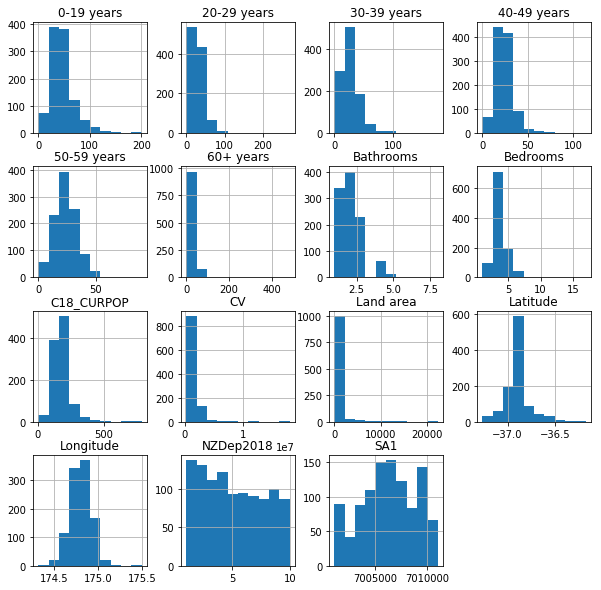

In [19]:
dfFinal.hist(figsize=(10, 10))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


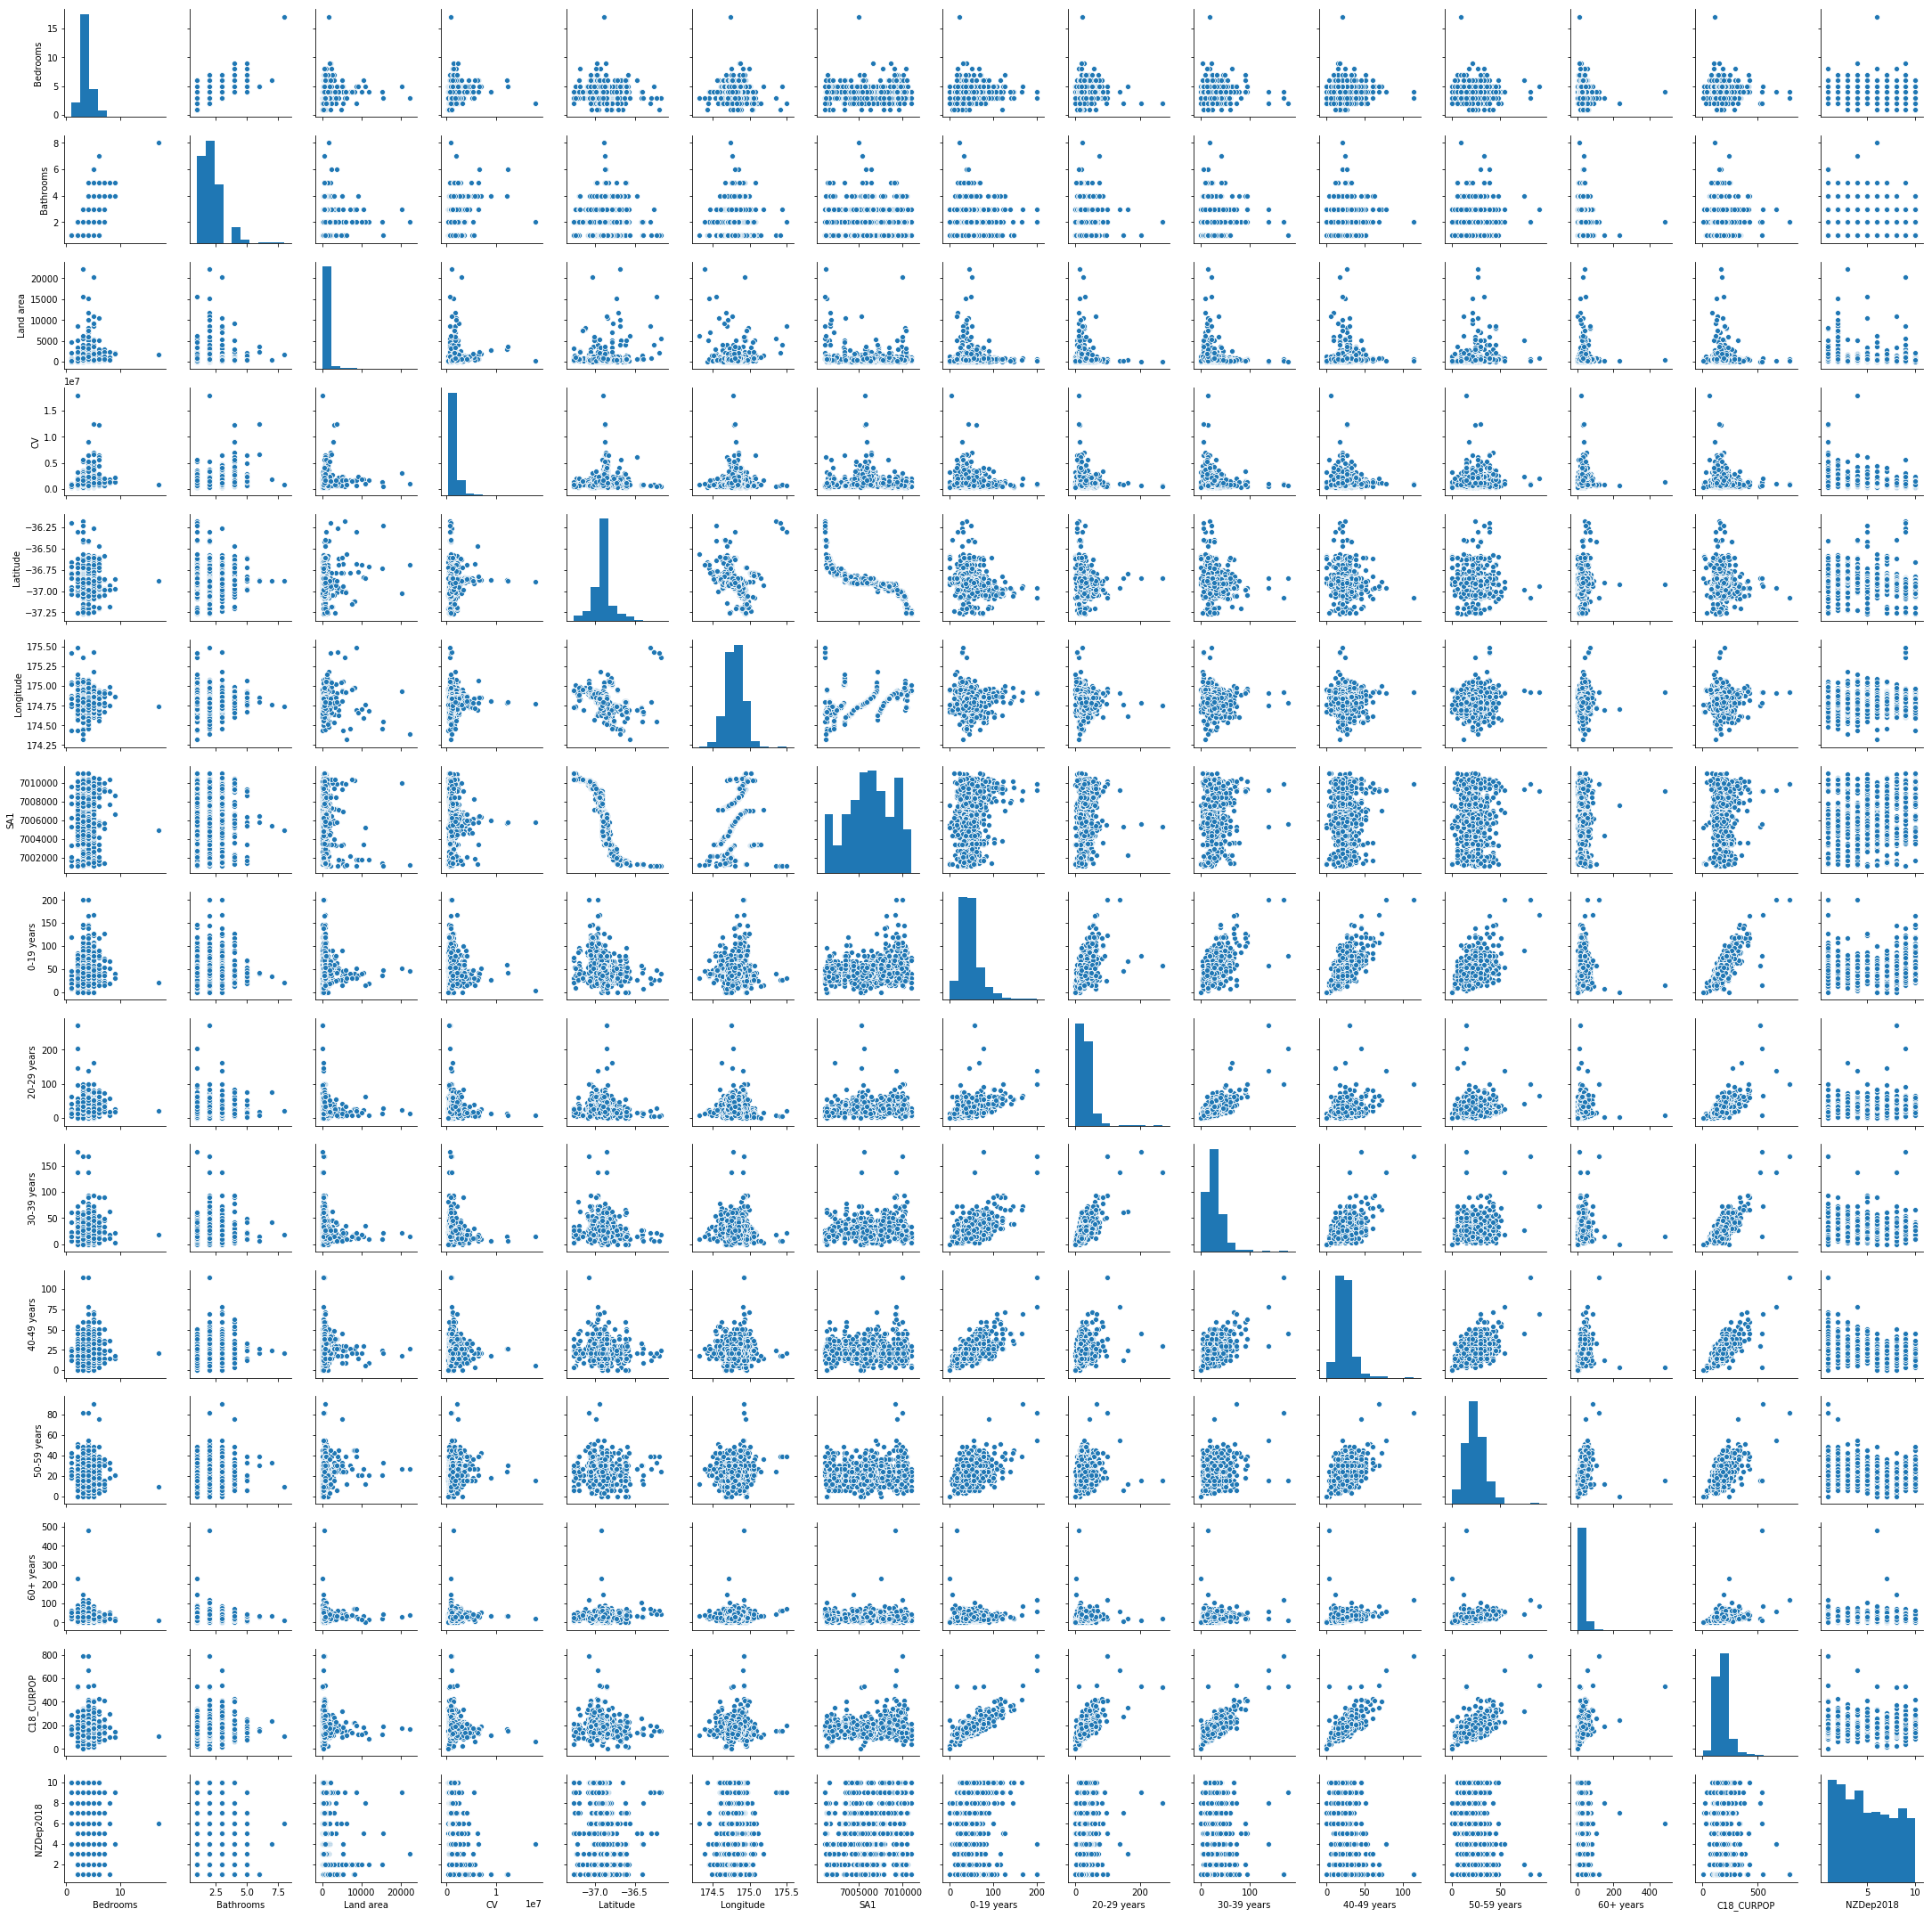

In [21]:
sns.pairplot(dfFinal, size = 2.0)

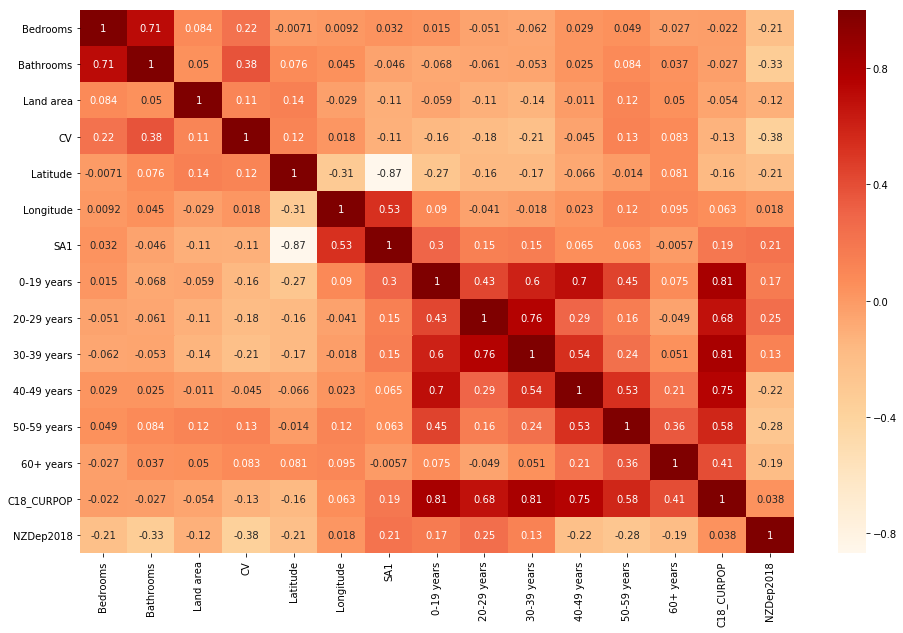

In [22]:
ax, fig = plt.subplots(figsize = (16,10))
correlation_matrix = dfFinal.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

In [44]:
dataset = dfFinal.drop(['Latitude', 'Longitude', 'SA1'], axis = 1)
dataset.head()

,Bedrooms,Bathrooms,Land area,CV,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,C18_CURPOP,NZDep2018
0,5,3.0,714.0,960000,48,27,24,21,24,21,174,6.0
1,5,3.0,564.0,1250000,42,18,12,21,15,30,129,1.0
2,6,4.0,626.0,1250000,42,18,12,21,15,30,129,1.0
3,2,1.0,65.0,740000,42,6,21,21,12,15,120,2.0
4,3,1.0,601.0,630000,93,27,33,30,21,33,231,9.0


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


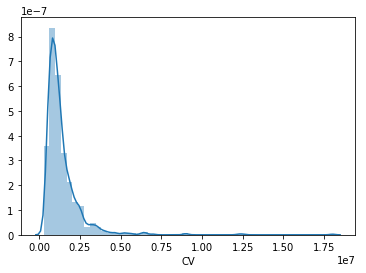

In [45]:
sns.distplot(dataset['CV'])

In [46]:
from sklearn.model_selection import train_test_split
x = dataset.drop('CV', axis = 1)
x.head()

,Bedrooms,Bathrooms,Land area,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,C18_CURPOP,NZDep2018
0,5,3.0,714.0,48,27,24,21,24,21,174,6.0
1,5,3.0,564.0,42,18,12,21,15,30,129,1.0
2,6,4.0,626.0,42,18,12,21,15,30,129,1.0
3,2,1.0,65.0,42,6,21,21,12,15,120,2.0
4,3,1.0,601.0,93,27,33,30,21,33,231,9.0


In [47]:
y = np.log(dataset['CV'])
y.head()

0    13.774689
1    14.038654
2    14.038654
3    13.514405
4    13.353475
Name: CV, dtype: float64

In [48]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [50]:
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
model.coef_

array([ 8.92318815e-03,  1.60925250e-01,  1.07330803e-05, -6.78543028e-04,
        1.87223752e-03, -5.70926511e-03,  1.23660593e-03,  7.03061558e-03,
        1.93111977e-03, -7.77913071e-04, -7.35393675e-02])

In [52]:
predicted = model.predict(test_x)

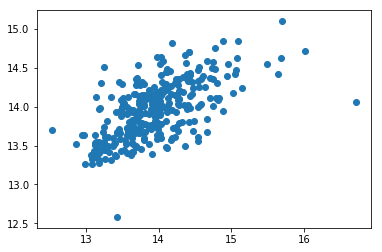

In [53]:
plt.scatter(test_y, predicted)

In [54]:
model.score(test_x, test_y)

0.3831047527965265